In [3]:
import numpy as np

# Load the NPZ file
data = np.load('../data/embedding_data/unspsc_embeddings.npz')
unspsc_data = [data[f] for f in data.files]

In [4]:
import numpy
st_embs = numpy.load("../data/embedding_data/sent_transformer_embeddings.npz")
st_embs = [st_embs[f] for f in st_embs.files]

tender_refs = open("../data/embedding_data/tender_references.txt", "r")
content = ""
for line in tender_refs:
    content = line
    break
    
content = content.replace("[", "")
content = content.replace("'", "")
content = content.replace(",", "")
content = content.replace("]", "")
refs = content.split(" ")

In [5]:

import pandas as pd
embeddings = pd.DataFrame({"Reference Number": refs, "embedding": st_embs})

In [6]:
embedding_data = np.array(embeddings['embedding'].tolist())

numpy.ndarray

In [8]:
# Initialize a list to collect cluster information
cluster_info = []

# Define the range of epsilon values you want to test
epsilon_range = np.arange(0.1, 2.0, 0.1)

for epsilon in epsilon_range:
    model = DBSCAN(eps=epsilon)
    cluster_labels = model.fit_predict(embedding_data)
    unique_labels, label_counts = np.unique(cluster_labels, return_counts=True)

    # Create a dictionary to store cluster information
    cluster_data = {
        "Epsilon": epsilon,
        "Num_Clusters": len(unique_labels),
        "Cluster_Info": {label: count for label, count in zip(unique_labels, label_counts)}
    }

    # Append the cluster information to the list
    cluster_info.append(cluster_data)

# DataFrame from the list of cluster information
dbscan_cluster_df = pd.DataFrame(cluster_info)


In [48]:
# Initialize a list to collect the new records
new_records = []

# Iterate through each row of the original DataFrame
for index, row in dbscan_cluster_df.iterrows():
    epsilon = row['Epsilon']
    cluster_info = row['Cluster_Info']
    
    # Iterate through the clusters in the Cluster_Info dictionary
    for cluster_label, num_points in cluster_info.items():
        # Create a new record for each cluster
        new_record = {
            'Epsilon': epsilon,
            'Cluster_Label': cluster_label,
            'Num_Points': num_points
        }
        new_records.append(new_record)

# new DataFrame from the list of records
new_dbscan_cluster_df = pd.DataFrame(new_records)


In [49]:
new_dbscan_cluster_df

,Epsilon,Cluster_Label,Num_Points
0,0.1,-1,20367
1,0.1,0,6
2,0.1,1,9
3,0.1,2,8
4,0.1,3,8
...,...,...,...
906,1.9,2,5
907,1.9,3,6
908,1.9,4,6
909,1.9,5,28


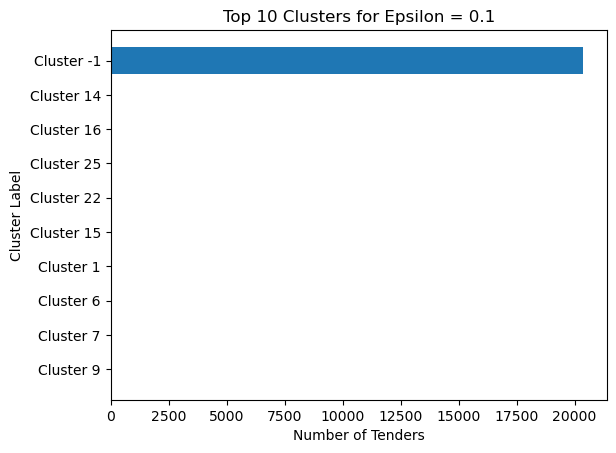

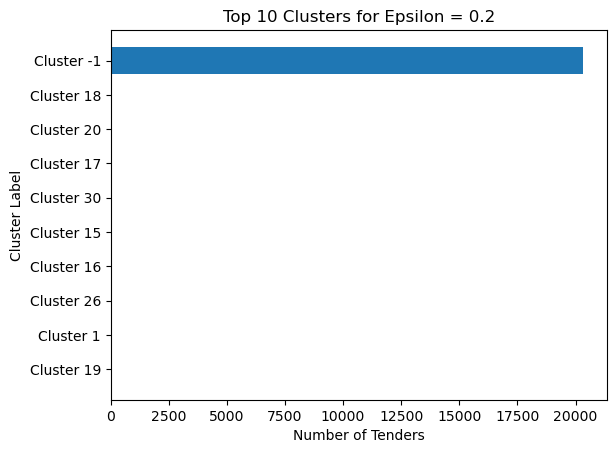

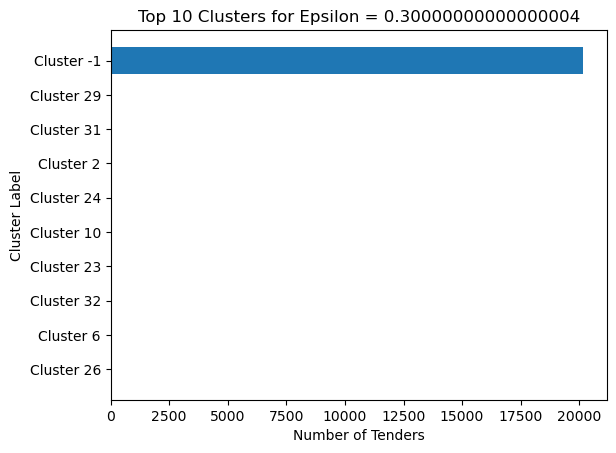

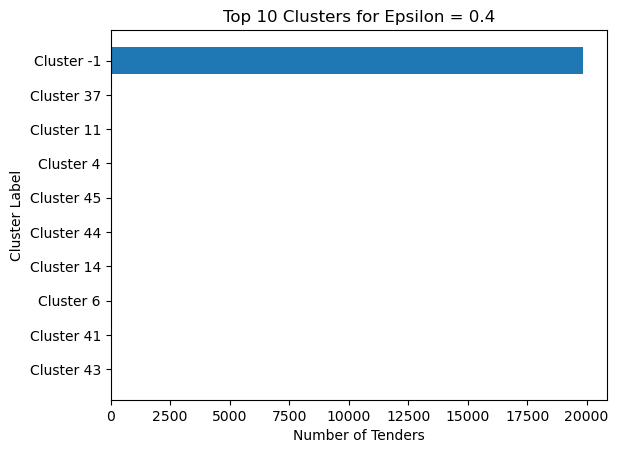

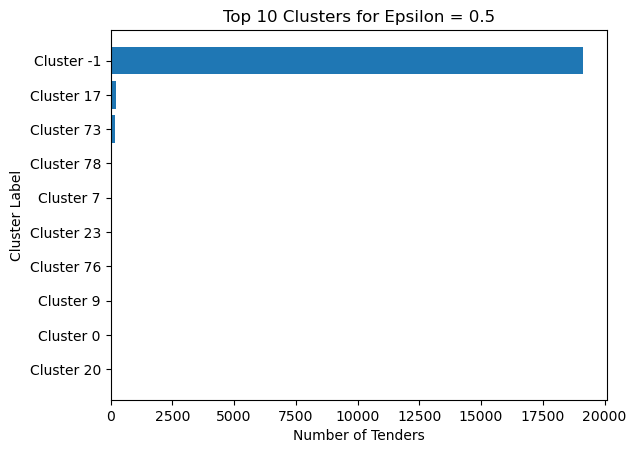

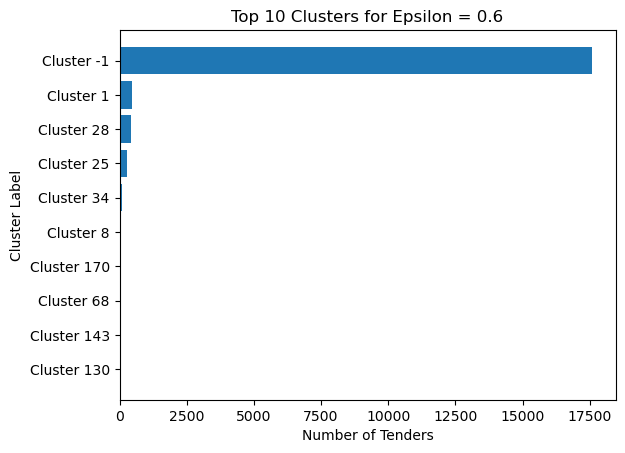

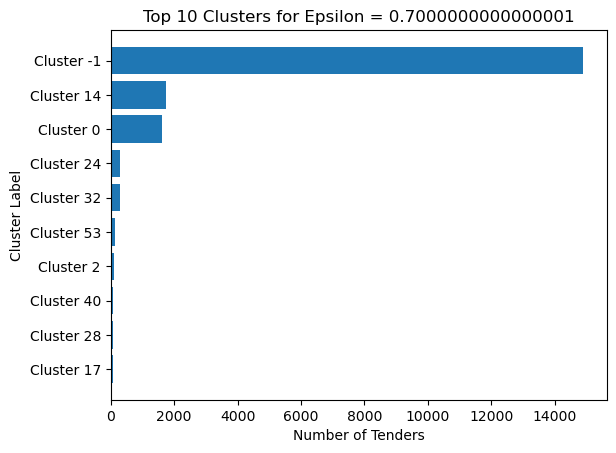

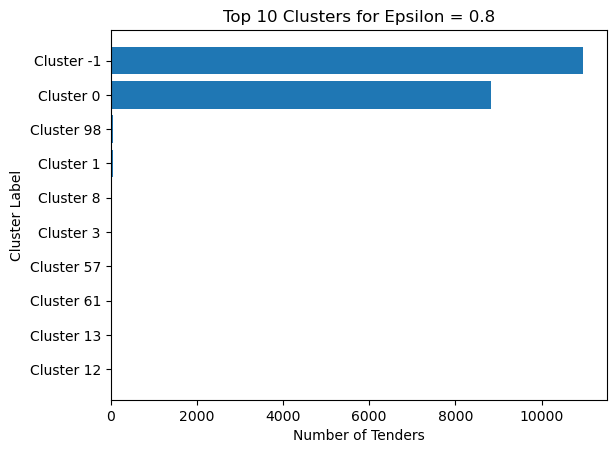

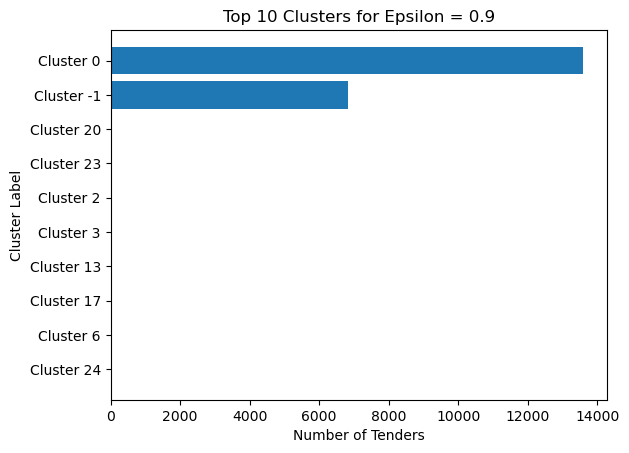

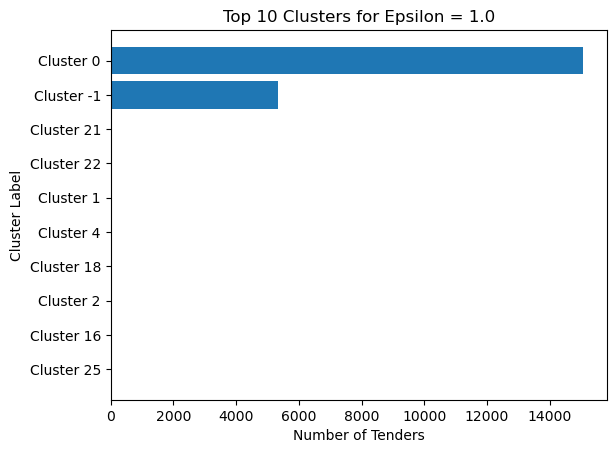

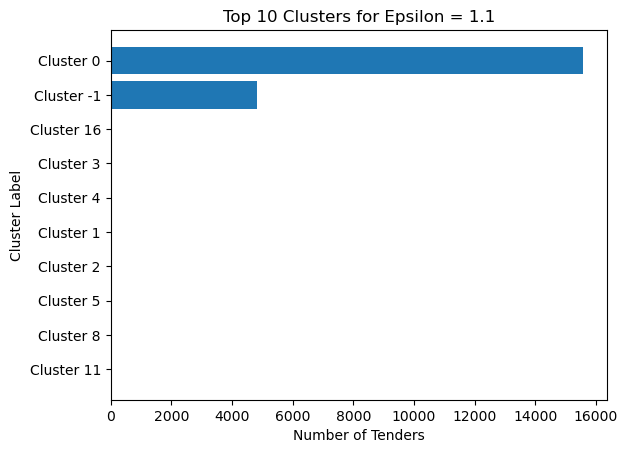

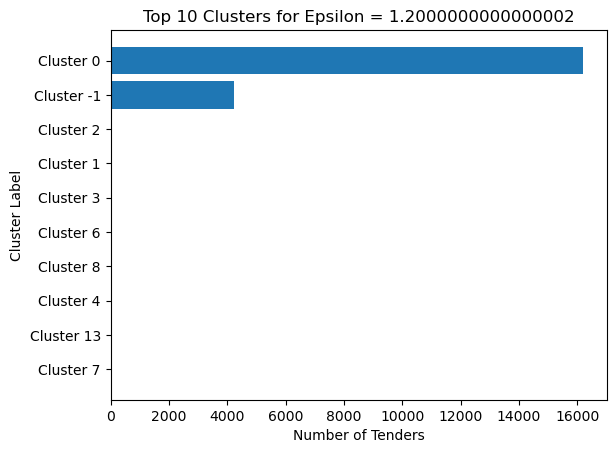

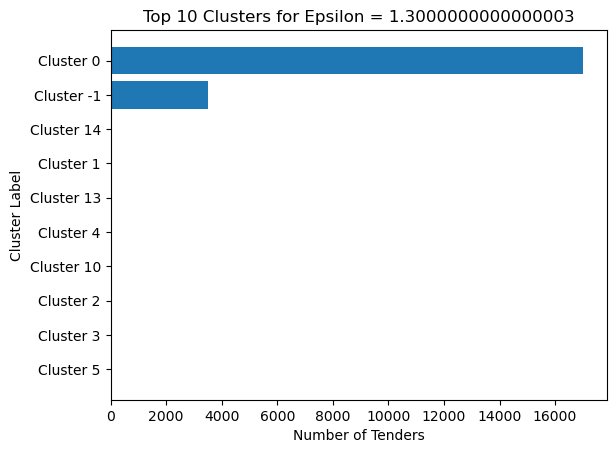

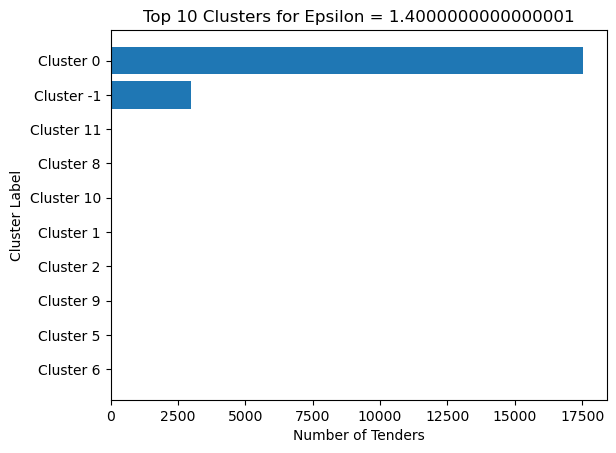

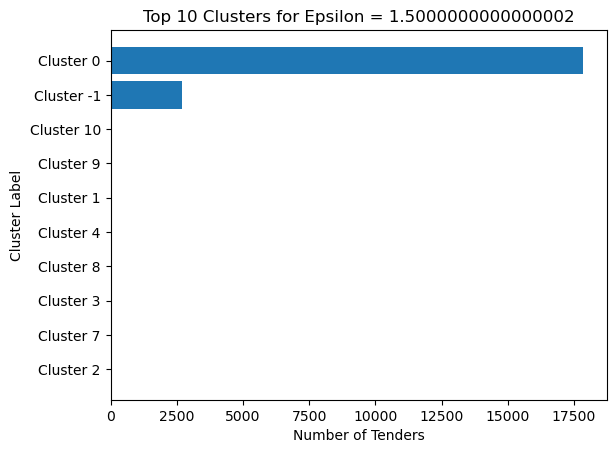

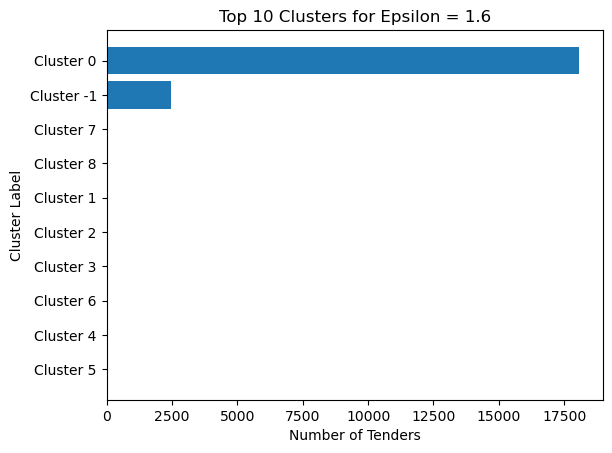

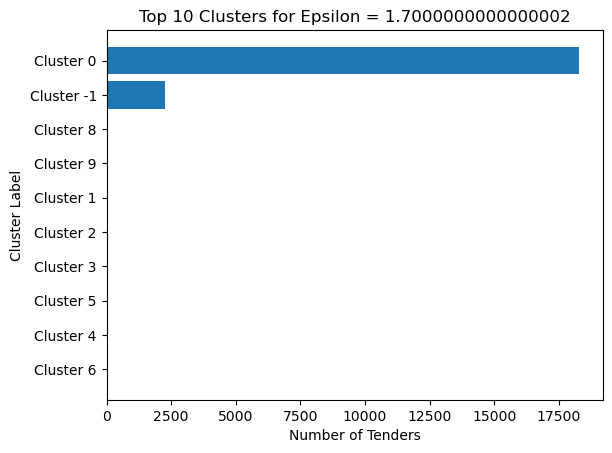

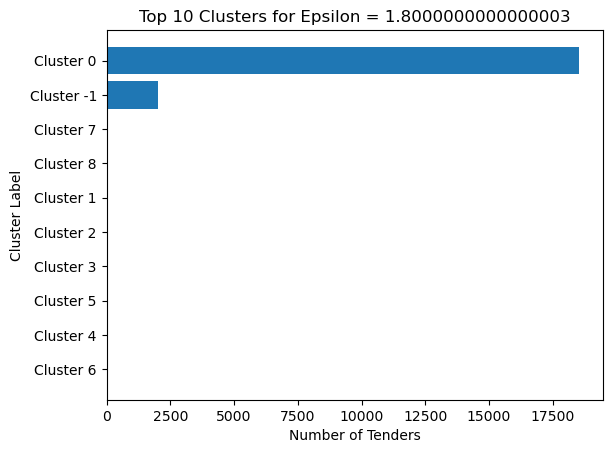

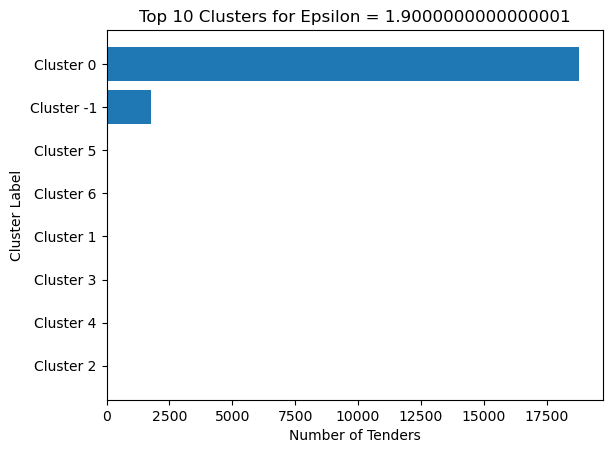

In [9]:
import matplotlib.pyplot as plt

for index, row in dbscan_cluster_df.iterrows():
    epsilon = row['Epsilon']
    cluster_info = row['Cluster_Info']

    # Sort the cluster_info by the number of instances in descending order
    sorted_clusters = sorted(cluster_info.items(), key=lambda item: item[1], reverse=True)

    # Get the top 10 clusters and their counts
    top_clusters = [item[0] for item in sorted_clusters[:10]]
    top_counts = [item[1] for item in sorted_clusters[:10]]
    cluster_labels = [f'Cluster {cluster}' for cluster in top_clusters]

    # Create a bar plot for the top clusters
    plt.barh(cluster_labels, top_counts)
    plt.xlabel('Number of Tenders')
    plt.ylabel('Cluster Label')
    plt.title(f'Top 10 Clusters for Epsilon = {epsilon}')
    plt.gca().invert_yaxis()  
    plt.show()

In [56]:
file_name = 'dbscan_tableau.xlsx'
new_dbscan_cluster_df.to_excel(file_name, index=False)

DBscan For bert_embeddings

In [57]:
import numpy
st_embs = numpy.load("../data/embedding_data/bert_embeddings.npz")
st_embs = [st_embs[f] for f in st_embs.files]

tender_refs = open("../data/embedding_data/tender_references.txt", "r")
content = ""
for line in tender_refs:
    content = line
    break
    
content = content.replace("[", "")
content = content.replace("'", "")
content = content.replace(",", "")
content = content.replace("]", "")
refs = content.split(" ")

In [58]:
import pandas as pd
bert_embeddings = pd.DataFrame({"Reference Number": refs, "embedding": st_embs})

bert_embedding_data = np.array(bert_embeddings['embedding'].tolist())

In [ ]:
# Initialize a list to collect cluster information
cluster_info = []

# Define the range of epsilon values you want to test
epsilon_range = np.arange(0.1, 2.0, 0.1)

for epsilon in epsilon_range:
    model = DBSCAN(eps=epsilon)
    cluster_labels = model.fit_predict(bert_embedding_data)
    unique_labels, label_counts = np.unique(cluster_labels, return_counts=True)

    # Create a dictionary to store cluster information
    cluster_data = {
        "Epsilon": epsilon,
        "Num_Clusters": len(unique_labels),
        "Cluster_Info": {label: count for label, count in zip(unique_labels, label_counts)}
    }

    # Append the cluster information to the list
    cluster_info.append(cluster_data)

# Create a DataFrame from the list of cluster information
dbscan_cluster_df = pd.DataFrame(cluster_info)


In [ ]:
# Initialize a list to collect the new records
new_records = []

# Iterate through each row of the original DataFrame
for index, row in dbscan_cluster_df.iterrows():
    epsilon = row['Epsilon']
    cluster_info = row['Cluster_Info']
    
    # Iterate through the clusters in the Cluster_Info dictionary
    for cluster_label, num_points in cluster_info.items():
        # Create a new record for each cluster
        new_record = {
            'Epsilon': epsilon,
            'Cluster_Label': cluster_label,
            'Num_Points': num_points
        }
        new_records.append(new_record)

# Create a new DataFrame from the list of records
new_dbscan_cluster_df = pd.DataFrame(new_records)


file_name = 'dbscan_Bert_tableau.xlsx'
new_dbscan_cluster_df.to_excel(file_name, index=False)